#  Actividad integradora : Modelo Presa-Depredador

### Aldo Tena García - A01275222

## Introducción
En ecología, la depredación es un tipo de interacción biológica en la que el individuo de una especie animal, denominado depredador, caza al individuo de otra especie, la presa, para subsistir. Un mismo individuo puede ser depredador de algunos animales y a su vez presa de otros, aunque en todos los casos el predador es carnívoro u omnívoro. Esta interacción ocupa un rol importante en la selección natural.

Los modelos matemáticos de depredación se encuentran entre los más antiguos de la ecología. Uno de los primeros fue propuesto por Thomas Robert Malthus (1766-1834), quien planteó un modelo unidimensional sobre la población humana. En su obra "An Essay on the Principle of Population as It Afects the Future Improvements of Society" (Malthus, 1809) intentó mostrar que "el crecimiento de la población humana sería más rápido que la producción de sustento y que no se alcanzaba esta situación debido a otros factores que frenaban el crecimiento natural de los humanos" (Oganician, 2017). Después de que el modelo unidimensional presentado por Malthus resultará ser uno de los más sencillos, dado que solo consideraba nacimientos y muertes, el biológo y matemático P.F. Verhulst logro mejorar el modelo de Malthus presentando el modelo logístico, en donde se tenía en cuenta la interacción de los individuos mediante una probabilidad de encuentro entre estos (García Montoya et al., 2019).

## Descripción

En esta actividad, diseñaremos un modelo presa-depredador que nos muestre la interacción entre tres especies. 

Cenitune, es un curioso exoplaneta de forma rectangular que se encuentra a más 4 millones años luz de la tierra. Este planeta es el sueño dorado de cualquier exobiólogo ya que cuenta con un ecosistema muy pequeño, pero no por ello simple. 

Toda la superficie de Cenitune se encuentra cubierta por una única especie de hierba. Esta hierba es el alimento de una raza llamada nonine. Los nonine son hervíboros pequeños que se pasan la vida muy felices comiendo y reprociendose. Bueno, la mayor parte del tiempo, ya que tiene que cuidarse de los deddian. Los deddian son los único carnívoros de Cenitune y su único alimento son los nonine.

### Reglas generales del modelo
* Dos nonine no pueden ocupar la misma sección.
* Dos deddian no pueden ocupar la misma sección.
* Cada nonine solo puede comer hierba si no ha llegado a su máxima capacidad de comida.
* Un deddian no se comerá un nonine si ha sobrepasado su capacidad máxima de comida.
* Nonines y deddians solo puede reproducirse cuando han llegado a cierta edad y ha logrado una cierta capacidad de cimida.
* Un nonine no puede reproducirse si hay un deddian a su alrededor.
* Nonines y deddians solo pueden mover hacia arriba, abajo, izquierda o derecha de su posición actual.
* Nonines y deddians mueren si son muy viejos o si no han comido lo suficiente.
* La hierba tiene una tasa de crecimiento de 1 unidad/ciclo.

### Reglas para los nonine
* Capacidad máxima de comida: 45 unidades.
* Tasa de metabolismo: 3 unidades/ciclo.
* Probilidad de reproducción en un ambiente adecuada: 50%
* Edad mínima de reproducción: 10 ciclos.
* Requisito mínimo de alimento para reproducirse: 40 unidades.
* Edad máxima: 25 etapas.
* Comida inicial: 10
* Un nonine le da un valor de comida de 10 a un deddian cuando se lo come.

En cada ciclo, 
* Un nonine se mueve aleatoriamente a uno de los cuatro campos vecinos, siempre que esté vacío (no existe otro nonine o deddian). Este movimiento le consume una cierta cantidad de la comida que ha ingerido. Si no hay celdas vecinas libres, no se produce movimiento.  
* Si no ha llegado a su capacidad máxima de comida, consumirá toda lo que hay en ese campo (hasta el límite definido). 
* Al superar su tiempo de reproducción predefidino, el nonine dará a a luz un nuevo nonine siempre y cuando tenga la energía necesaria y esté en un ambiente adecuado. El nuevo nonine se deberá generar en una celda vecina vacía. Si no se cumple alguno de estos requisitos, no se generará ningún nuevo nonine.

### Reglas para los deddian
* Capacidad máxima de comida: 200 unidades.
* Tasa de metabolismo: 2 unidades/ciclo.
* Probilidad de reproducción en un ambiente adecuada: 50%
* Edad mínima de reproducción: 10 ciclos.
* Requisito mínimo de alimento para reproducirse: 120 unidades.
* Edad máxima: 50 etapas.
* Comida inicial: 150

En cada ciclo, 
* Un deddian se mueve aleatoriamente a uno de los cuatro campos vecinos, siempre que no haya otro deddian. Este movimiento le consume una cierta cantidad de la comida que ha ingerido. Si no hay celdas vecinas libres de deddians, no se produce movimiento.  
* Si se encuentra con un nonine y no ha sobrepasado su capacidad máxima, se lo comerá. Obteniendo una cantidad de energía definida.
* Al superar su tiempo de reproducción predefidino, el deddian dará a a luz un nuevo deddian siempre y cuando tenga la energía necesaria y esté en un ambiente adecuado. El nuevo deddian se deberá generar en una celda vecina vacía. Si no se cumple alguno de estos requisitos, no se generará ningún nuevo deddian.

### Simulación
* El planeta tenga un ancho y alto de 35 celdas.
* Inicialmente, habrá 47 nonines y 15 deddians.
* Todos los campos empiezan con 20 unidades de hierba.
* La simulación se realizará durante 200 iteraciones.
* Deberá visualizar la evolución del modelo.

In [94]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
from mesa import Agent, Model 

# Con RandomActivation, hacemos que todos los agentes se activen aleatoriamente.
from mesa.time import RandomActivation,BaseScheduler

# Haremos uso de DataCollector para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

from mesa.space import SingleGrid

# matplotlib sera usado para crear una animación de cada uno de los pasos del modeloen conjunto con el datacollector.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos el siguiente paquete para generar números random.
import random

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

In [95]:
class Nonine(Agent):

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        #Condiciones iniciales
        self.type = 0 #Presa
        self.maxFood = 45
        self.metabolism = 3
        self.mateProbability = 0.5
        self.minAgeRepro = 10
        self.minFoodRepro = 40
        self.maxAge = 25
        #Condiciones en el modelo
        self.actualAge = 0
        self.actualFood = 10

    def initialUpdate(self):
        #Al inicio del step sumar un ciclo y restar comida
        self.actualAge += 1
        self.actualFood -= self.metabolism

    def isAlive(self):
        #Comprobar si es necesario matar al agente
        if self.actualAge >= self.maxAge or self.actualFood <= 0:
            return False
        else:
            return True

    def killAgent(self):
        #Remover el agente del grid y del schedule
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

    def canReproduce(self):
        #Comprobar si existen las condiciones para reproducirse
        if self.actualAge >= self.minAgeRepro and self.minFoodRepro <= self.actualFood:
            return True
        else:
            return False

    def isPredatorAround(self):
        #Comprobar si existen depredares en las 4 casillas inmediatas
        #Checar que la casilla hacia arriba de este dentro del grid
        if self.pos[1]+1 <= self.model.grid.height-1 and not self.model.grid.is_cell_empty([self.pos[0], self.pos[1]+1]):
            #Si hay un agente ocupando la casilla se obtiene su información
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0], self.pos[1]+1)])[0]
            #Si el agente en la siguiente casilla es depredador self.predatorAround cambia a True
            if agentAround.type == 1:
                return True
        #Checar que la casilla a la derecha de este dentro del grid
        elif self.pos[0]+1 <= self.model.grid.width-1 and not self.model.grid.is_cell_empty([self.pos[0]+1, self.pos[1]]):
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0]+1, self.pos[1])])[0]
            if agentAround.type == 1:
                return True
        #Checar que la casilla hacia abajo de este dentro del grid
        elif self.pos[1]-1 >= 0 and not self.model.grid.is_cell_empty([self.pos[0], self.pos[1]-1]):
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0], self.pos[1]-1)])[0]
            if agentAround.type == 1:
                return True
        #Checar que la casilla a la izquierda de este dentro del grid
        elif self.pos[0]-1 >= 0 and not self.model.grid.is_cell_empty([self.pos[0]-1, self.pos[1]]):
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0]-1, self.pos[1])])[0]
            if agentAround.type == 1:
                return True
        #Si no hay deddians regresar False
        else:
            return False

    def reproduce(self):
        #Checar que la casilla hacia arriba de este dentro del grid
        if self.pos[1]+1 <= self.model.grid.height-1 and self.model.grid.is_cell_empty([self.pos[0], self.pos[1]+1]):
            self.spawnNonine(self.pos[0],self.pos[1]+1)
        #Checar que la casilla hacia la derecha de este dentro del grid
        elif self.pos[0]+1 <= self.model.grid.width-1 and self.model.grid.is_cell_empty([self.pos[0]+1, self.pos[1]]):
            self.spawnNonine(self.pos[0]+1,self.pos[1])
        #Checar que la casilla hacia abajo de este dentro del grid
        elif self.pos[1]-1 >= 0 and self.model.grid.is_cell_empty([self.pos[0], self.pos[1]-1]):
            self.spawnNonine(self.pos[0],self.pos[1]-1)
        #Checar que la casilla hacia abajo de este dentro del grid
        elif self.pos[0]-1 >= 0 and self.model.grid.is_cell_empty([self.pos[0]-1, self.pos[1]]):
            self.spawnNonine(self.pos[0]-1,self.pos[1])

    def spawnNonine(self,x,y):
        #Hacer a un nuevo Nonine en una posición previamente establecida arriba
        newborn = Nonine(self.model.idNonie,self.model)
        self.model.schedule.add(newborn)
        self.model.grid.place_agent(newborn,(x,y))
        self.model.idNonie += 1

    def eatGrass(self):
        #Revisar la cantidad de comida en la ubicación actual del agente
        foodInCell = self.model.floor[self.pos[0]][self.pos[1]]
        #Obtener la cantidad maxima de comida que puede ingerir el Nonine
        foodCanEat = self.maxFood - self.actualFood
        #Si la cantidad de comida disponible supera la capacidad de comer del Nonine comer todo lo posible
        if foodInCell >= foodCanEat:
            self.model.floor[self.pos[0]][self.pos[1]] -= foodCanEat
            self.actualFood += foodCanEat
        #Si la cantidad de comida disponible no supera la capacidad de comer del Nonine comer todo lo disponible
        else:
            self.model.floor[self.pos[0]][self.pos[1]] == 0
            self.actualFood += foodInCell

    def moveUp(self):
        #Checar y mover hacia arriba
        if self.pos[1]+1 <= self.model.grid.height-1 and self.model.grid.is_cell_empty([self.pos[0], self.pos[1]+1]):
            self.model.grid.move_agent(self, (self.pos[0],self.pos[1]+1))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def moveRight(self):
        #Checar y mover a la derecha
        if self.pos[0]+1 <= self.model.grid.width-1 and self.model.grid.is_cell_empty([self.pos[0]+1, self.pos[1]]):
            self.model.grid.move_agent(self,(self.pos[0]+1,self.pos[1]))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def moveDown(self):
        #Checar y mover hacia abajo
        if self.pos[1]-1 >= 0 and self.model.grid.is_cell_empty([self.pos[0], self.pos[1]-1]):
            self.model.grid.move_agent(self,(self.pos[0],self.pos[1]-1))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def moveLeft(self):
        #Checar y mover a la izquierda
        if self.pos[0]-1 >= 0 and self.model.grid.is_cell_empty([self.pos[0]-1, self.pos[1]]):
            self.model.grid.move_agent(self,(self.pos[0]-1,self.pos[1]))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def remainStatic(self):
        #El agente se queda estatico
        self.model.grid.move_agent(self,(self.pos[0], self.pos[1]))

    def chooseDirection(self,options):
        #Se manda a llamar de manera aleatoria a las funciones de movimiento
        elements = len(options) #Se obtiene la cantidad de elementos en la lista
        #Si la cantidad de posibles direcciones es mayor a 0 elegir una al azar
        if elements != 0:
            choice = np.random.choice(options)
            completed = True
            #Si la opcion fue elegida se ejecuta
            if choice == 1:
                #Se ejecuta la tarea y regresa True en caso de haber ejecutado satosfactoriamente
                task = self.moveUp()
                #Si la función regresa un False significa que no se puede desplazar a esa casilla
                if task != completed:
                    #Remover esta dirección de las posibles opciones de movimiento
                    tempList = list(options)
                    tempList.remove(1)
                    outTuple = tuple(tempList)
                    #Volver a llamar a esta misma función quitando la dirección a la que no es posible moverse
                    self.chooseDirection(outTuple)
            if choice == 2:
                task = self.moveRight()
                if task != completed:
                    tempList = list(options)
                    tempList.remove(2)
                    outTuple = tuple(tempList)
                    self.chooseDirection(outTuple)
            if choice == 3:
                task = self.moveDown()
                if task != completed:
                    tempList = list(options)
                    tempList.remove(3)
                    outTuple = tuple(tempList)
                    self.chooseDirection(outTuple)
            if choice == 4:
                task = self.moveLeft()
                if task != completed:
                    tempList = list(options)
                    tempList.remove(4)
                    outTuple = tuple(tempList)
                    self.chooseDirection(outTuple)
        #Si no se puede mover en ninguna de las 4 direcciones, el agente se queda estatico
        else:
            self.remainStatic()

    def move(self):
        #Iniciar las posibles direcciones en las que se puede mover el agente
        posibleDirections = (1,2,3,4)
        self.chooseDirection(posibleDirections)

    def step(self):
        #Actualizar edad y comida del agente
        self.initialUpdate()
        #Verificar si el agente sigue con vida
        state = self.isAlive()
        #Si el agente esta muerto, removerlo de la simulación
        if state == False:
            #Eliminación del agente
            self.killAgent()
        #Desde este punto sabemos que el agente esta con vida
        else:
            #Comer todo lo que el nonine pueda 
            if self.actualFood < self.maxFood:
                self.eatGrass()
            #Moverse en la primer dirección que sea viable
            self.move()
            #Verificar si el agente puede reproducirse
            #El nonine puede reproducirse
            if self.canReproduce() == True: 
                #Si no hay depredadores cerca ver si procede su reproducción
                if self.isPredatorAround() == False: 
                    #Si sale 1 se va a reproducir,probabilidad del 50%
                    mateChoice = np.random.choice([0,1])
                    if self.mateProbability > mateChoice:
                        #Metodo para reproducirse, llama a spawnNonine()
                        self.reproduce()

In [96]:
class Deddian(Agent):

    def __init__(self, unique_id, model, initialFood):
        super().__init__(unique_id, model)
        #Condiciones iniciales
        self.type = 1 #Depredador
        self.maxFood = 200
        self.metabolism = 2
        self.mateProbability = 0.5
        self.minAgeRepro = 10
        self.minFoodRepro = 120
        self.maxAge = 50
        self.gainFromNonine = 12 #Aumenta en 2 unidades para cubrir la energía de moverse para cazarlo (2 unidades)
        #Condiciones en el modelo
        self.actualAge = 0
        self.actualFood = initialFood

    def initialUpdate(self):
        #Al inicio del step sumar un ciclo y restar comida
        self.actualAge += 1
        self.actualFood -= self.metabolism

    def isAlive(self):
        #Comprobar si es necesario matar al agente
        if self.actualAge >= self.maxAge or self.actualFood <= 0:
            return False
        else:
            return True

    def killAgent(self):
        #Remover el agente del grid y del schedule
        self.model.grid.remove_agent(self)
        self.model.schedule.remove(self)

    def eatNonine(self):
        #Comprobar si existen presas en las 4 casillas inmediatas
        #Checar que la casilla hacia arriba de este dentro del grid
        if self.pos[1]+1 <= self.model.grid.height-1 and not self.model.grid.is_cell_empty([self.pos[0], self.pos[1]+1]):
            #Si hay un agente ocupando la casilla se obtiene su información
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0], self.pos[1]+1)])[0]
            #Si el agente en la siguiente casilla es un nonine se procede con la caceria
            if agentAround.type == 0:
                #Se elimina/mata al nonine
                self.model.grid.remove_agent(agentAround)
                self.model.schedule.remove(agentAround)
                #Se mueve a la posición donde anteriormente estaba el nonine
                self.model.grid.move_agent(self, (self.pos[0], self.pos[1]+1))
                #Se gana la energia correspondiente de matar al nonine
                self.actualFood += self.gainFromNonine
        #Checar que la casilla hacia la derecha de este dentro del grid
        elif self.pos[0]+1 <= self.model.grid.width-1 and not self.model.grid.is_cell_empty([self.pos[0]+1, self.pos[1]]):
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0]+1, self.pos[1])])[0]
            if agentAround.type == 0:
                self.model.grid.remove_agent(agentAround)
                self.model.schedule.remove(agentAround)
                self.model.grid.move_agent(self, (self.pos[0]+1, self.pos[1]))
                self.actualFood += self.gainFromNonine
        #Checar que la casilla hacia abajo de este dentro del grid
        elif self.pos[1]-1 >= 0 and not self.model.grid.is_cell_empty([self.pos[0], self.pos[1]-1]):
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0], self.pos[1]-1)])[0]
            if agentAround.type == 0:
                self.model.grid.remove_agent(agentAround)
                self.model.schedule.remove(agentAround)
                self.model.grid.move_agent(self, (self.pos[0], self.pos[1]-1))
                self.actualFood += self.gainFromNonine
        #Checar que la casilla hacia la izquierda de este dentro del grid
        elif self.pos[0]-1 >= 0 and not self.model.grid.is_cell_empty([self.pos[0]-1, self.pos[1]]):
            agentAround = self.model.grid.get_cell_list_contents([(self.pos[0]-1, self.pos[1])])[0]
            if agentAround.type == 0:
                self.model.grid.remove_agent(agentAround)
                self.model.schedule.remove(agentAround)
                self.model.grid.move_agent(self, (self.pos[0]-1, self.pos[1]))
                self.actualFood += self.gainFromNonine

    def canReproduce(self):
        #Comprobar si existen las condiciones para reproducirse
        if self.actualAge >= self.minAgeRepro and self.minFoodRepro <= self.actualFood:
            return True
        else:
            return False

    def reproduce(self):
        #Checar que la casilla hacia arriba de este dentro del grid
        if self.pos[1]+1 <= self.model.grid.height-1 and self.model.grid.is_cell_empty((self.pos[0], self.pos[1]+1)): 
            halfFood = self.actualFood//2
            self.actualFood = halfFood
            self.spawnDeddian(self.pos[0],self.pos[1]+1,halfFood)
        #Checar que la casilla hacia la derecha de este dentro del grid
        elif self.pos[0]+1 <= self.model.grid.width-1 and self.model.grid.is_cell_empty((self.pos[0]+1, self.pos[1])):
            halfFood = self.actualFood//2
            self.actualFood = halfFood
            self.spawnDeddian(self.pos[0]+1,self.pos[1],halfFood)
        #Checar que la casilla hacia abajo de este dentro del grid
        elif self.pos[1]-1 >= 0 and self.model.grid.is_cell_empty((self.pos[0], self.pos[1]-1)):
            halfFood = self.actualFood//2
            self.actualFood = halfFood
            self.spawnDeddian(self.pos[0],self.pos[1]-1,halfFood)
        #Checar que la casilla hacia abajo de este dentro del grid
        elif  self.pos[0]-1 >= 0 and self.model.grid.is_cell_empty((self.pos[0]-1, self.pos[1])):
            halfFood = self.actualFood//2
            self.actualFood = halfFood
            self.spawnDeddian(self.pos[0]-1,self.pos[1],halfFood)

    def spawnDeddian(self,x,y,initialFood):
        #Hacer a un nuevo Deddian en una posición previamente establecida arriba
        newborn = Deddian(self.model.idDedians,self.model,initialFood)
        self.model.schedule.add(newborn)
        self.model.grid.place_agent(newborn,(x,y))
        self.model.idDedians += 1

    def moveUp(self):
        #Checar y mover hacia arriba
        if self.pos[1]+1 <= self.model.grid.height-1 and self.model.grid.is_cell_empty([self.pos[0], self.pos[1]+1]):
            self.model.grid.move_agent(self,(self.pos[0],self.pos[1]+1))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def moveRight(self):
        #Checar y mover a la derecha
        if self.pos[0]+1 <= self.model.grid.width-1 and self.model.grid.is_cell_empty([self.pos[0]+1, self.pos[1]]):
            self.model.grid.move_agent(self,(self.pos[0]+1, self.pos[1]))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def moveDown(self):
        #Checar y mover hacia abajo
        if self.pos[1]-1 >= 0 and self.model.grid.is_cell_empty([self.pos[0], self.pos[1]-1]):
            self.model.grid.move_agent(self,(self.pos[0], self.pos[1]-1))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def moveLeft(self):
        #Checar y mover a la izquierda
        if self.pos[0]-1 >= 0 and self.model.grid.is_cell_empty([self.pos[0]-1, self.pos[1]]):
            self.model.grid.move_agent(self,(self.pos[0]-1, self.pos[1]))
            self.actualFood -= self.metabolism
            return True
        else: 
            return False

    def remainStatic(self):
        #El agente se queda estatico
        self.model.grid.move_agent(self,(self.pos[0], self.pos[1]))

    def chooseDirection(self,options):
        #Se manda a llamar de manera aleatoria a las funciones de movimiento
        elements = len(options) #Se obtiene la cantidad de elementos en la lista
        #Si la cantidad de posibles direcciones es mayor a 0 elegir una al azar
        if elements != 0:
            choice = random.choice(options)
            completed = True
            #Si la opcion fue elegida se ejecuta
            if choice == 1:
                #Se ejecuta la tarea y regresa True en caso de haber ejecutado satosfactoriamente
                task = self.moveUp()
                #Si la función regresa un False significa que no se puede desplazar a esa casilla
                if task != completed:
                    #Remover esta dirección de las posibles opciones de movimiento
                    tempList = list(options)
                    tempList.remove(1)
                    outTuple = tuple(tempList)
                    #Volver a llamar a esta misma función quitando la dirección a la que no es posible moverse
                    self.chooseDirection(outTuple)
            if choice == 2:
                task = self.moveRight()
                if task != completed:
                    tempList = list(options)
                    tempList.remove(2)
                    outTuple = tuple(tempList)
                    self.chooseDirection(outTuple)
            if choice == 3:
                task = self.moveDown()
                if task != completed:
                    tempList = list(options)
                    tempList.remove(3)
                    outTuple = tuple(tempList)
                    self.chooseDirection(outTuple)
            if choice == 4:
                task = self.moveLeft()
                if task != completed:
                    tempList = list(options)
                    tempList.remove(4)
                    outTuple = tuple(tempList)
                    self.chooseDirection(outTuple)
        #Si no se puede mover en ninguna de las 4 direcciones, el agente se queda estatico
        else:
            self.remainStatic()

    def move(self):
        #Iniciar las posibles direcciones en las que se puede mover el agente
        posibleDirections = (1,2,3,4)
        self.chooseDirection(posibleDirections)

    def step(self):
        #Actualizar edad y comida del agente
        self.initialUpdate()
        #Verificar si el agente sigue con vida
        state = self.isAlive()
        #Si el agente esta muerto, removerlo de la simulación
        if state == False:
            #Eliminación del agente
            self.killAgent()
        #Desde este punto sabemos que el agente esta con vida
        else:
            #Comer si hay algun nonine cerca 
            if self.actualFood <= self.maxFood-10:
                self.eatNonine()
            #Moverse en la primer dirección que sea viable
            self.move()
            #Verificar si el agente puede reproducirse
            if self.canReproduce() == True: #El deddian puede reproducirse
                #Si sale 1 se va a reproducir,probabilidad del 50%
                mateChoice = np.random.choice([0,1])
                if self.mateProbability > mateChoice:
                    #Metodo para reproducirse, llama a spawnNonine()
                    self.reproduce()

In [97]:
def getGrid(model):
    #Aumentar por iteracion el valor del pasto en 1
    #grid = np.zeros( (model.grid.height, model.grid.width) ) - No se si borrarlo
    for ren in range(model.grid.height):
        for col in range(model.grid.width):
            model.floor[ren][col] += 1
    #Revisar el modelo
    grid = np.zeros( (model.grid.width, model.grid.height) )
    for (content, x, y) in model.grid.coord_iter():
        if model.grid.is_cell_empty((x,y)):
            grid[x][y] = 0
        else:
            if content.type == 0:
                grid[x][y] = 0.5
            else:
                grid[x][y] = 1
    return grid

In [98]:
class Cenitune(Model):

    def __init__(self,height,width,nonine,deddian):
        self.grid = SingleGrid(height,width,False)
        self.schedule = RandomActivation(self)
        self.idNonie = 48
        self.idDedians = 10016
        #Generamos el pasto con un valor inicial de 20
        self.floor = np.zeros( (height,width) )
        for ren in range(height):
            for col in range(width):
                self.floor[ren][col] = 20
        #Generamos los agentes nonine(presas)
        for i in range(nonine):
            x = np.random.randint(0,width)
            y = np.random.randint(0,height)
            while self.grid[x, y] != None:
                x = np.random.randint(0, width)
                y = np.random.randint(0, height)
            prey = Nonine(i,self)
            self.grid.place_agent(prey,(x,y))
            self.schedule.add(prey)
        #Generamos los agentes deddian(depredadores)
        for i in range(deddian):
            x = np.random.randint(0,width)
            y = np.random.randint(0,height)
            while self.grid[x, y] != None:
                x = np.random.randint(0, width)
                y = np.random.randint(0, height)
            predator = Deddian(i+10000,self,150)
            self.schedule.add(predator)
            self.grid.place_agent(predator,(x,y))
        #Incremento del valor del pasto en cada iteración
        self.datacollector = DataCollector(model_reporters={"Grid":getGrid})

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [99]:
GRID_SIZE = 35
MAX_ITERATIONS = 200
NONINE = 47
DEDDIAN = 15

start_time = time.time()
model = Cenitune(GRID_SIZE,GRID_SIZE,NONINE,DEDDIAN)

i = 1
while i <= MAX_ITERATIONS:
    model.step()
    i += 1

print("Tiempo de ejecucion: ", str(datetime.timedelta(time.time() - start_time)))

Tiempo de ejecucion:  2 days, 16:07:30.906372


In [100]:
all_grid = model.datacollector.get_model_vars_dataframe()
print(all_grid)

                                                  Grid
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
..                                                 ...
195  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.5,...
196  [[0.0, 0.0, 0.5, 0.0, 0.5, 0.5, 0.0, 0.5, 0.0,...
197  [[0.0, 0.5, 0.5, 0.0, 0.0, 0.5, 0.5, 0.0, 0.5,...
198  [[0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.5,...
199  [[0.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0,...

[200 rows x 1 columns]


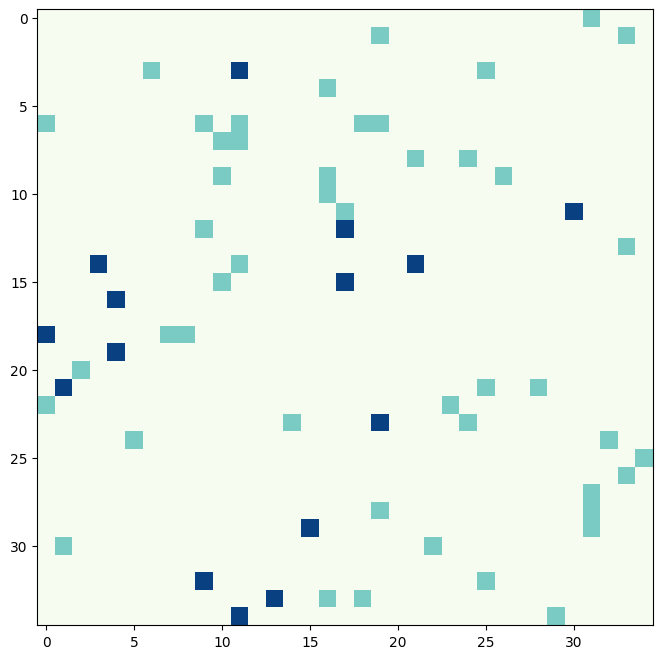

In [101]:
fig, axs = plt.subplots(figsize=(8,8))
axs.set_xticks = ([])
axs.set_yticks = ([])
patch = plt.imshow(all_grid.iloc[0][0], cmap='GnBu', interpolation='nearest')

def animate(i):
    patch.set_data(all_grid.iloc[i][0])
anim = animation.FuncAnimation(fig,animate,frames=MAX_ITERATIONS)

In [102]:
anim